In [2]:
import sys
sys.path.append('../') # Change path
from Functions import * 

In [3]:
# Matrix Y, containing all possilbe edges
Y = [[1, 1, 2],
     [-1, 1, 3],
     [-1, 1, 4],
     [1, 2, 3],
     [1, 2, 4],
     [1, 3, 4]]

In [56]:
# Define mu and cov_matrix to be able to sample #num_samples samples from a multivariate normal distribution
mu = np.zeros(2) 
cov_matrix = np.array([[1.0, 0.5], [0.5, 2.0]]) 
num_samples = 4

points = {l+1: np.random.multivariate_normal(mu, cov_matrix) for l in range(num_samples)} # Generate points

In [57]:
# Adding stopping criteria
alpha = 5 # Change alpha here
prev_grad = 200 
grad = 0
k = 0
n = 100000
MLL = np.zeros(n) # Define the MLL
grad_sum = np.zeros(n) # Define the gradient sum

while abs(prev_grad - grad) > 0.01: # stopping criteria
    prev_grad = grad
    for i in range(1,num_samples+1): # Run over number of num_samples
        for j in range(2): # Run over dimension
            grad_sum[k] += Gradient_function_prior(i,j,Y,points, "norm", alpha)**2
            points[i][j] += LR(k)*Gradient_function_prior(i,j,Y,points, "norm", alpha) # Use Gradient_function and take step=0.1*grad
    grad = grad_sum[k]
    MLL[k] = Loss_function_prior(points,Y,2, "norm", alpha) # Calcualte the probability using Loss_function
    k += 1

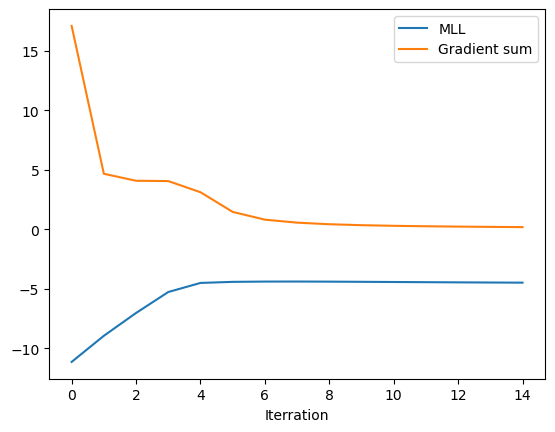

In [58]:
plt.plot(MLL[0:k],label='MLL')
plt.plot(np.sqrt(grad_sum[0:k]), label='Gradient sum')
#plt.ylabel('MLL')
plt.xlabel('Iterration')
plt.legend()
plt.show()

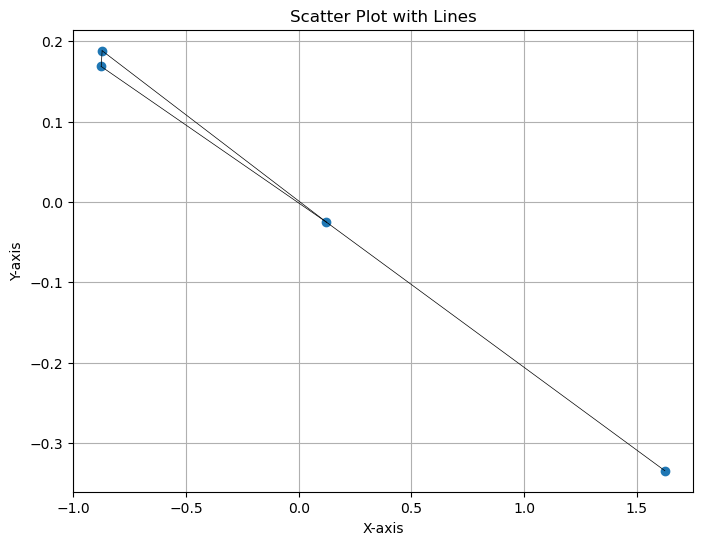

In [7]:
plt.figure(figsize=(8, 6))

for m in range(len(Y)): 
    if Y[m][0] == 1: # Check if there is a connection between Y[m][1] and Y[m][2]
        point1 = points[Y[m][1]]
        point2 = points[Y[m][2]]
        plt.plot([point1[0], point2[0]], [point1[1], point2[1]], color='black', linewidth=0.5) # Ad a line between Y[m][1] and Y[m][2]

# extract the points and plot them
x = [point[0] for point in points.values()]
y = [point[1] for point in points.values()]
plt.scatter(x, y)#, color=['red', 'green', 'blue', 'purple'])

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot with Lines')
plt.grid(True)
plt.show()

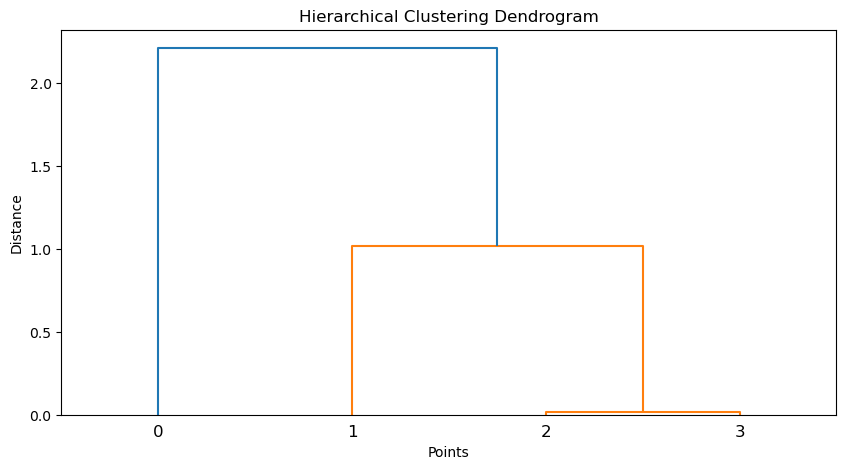

In [10]:
import numpy as np
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Calculate pairwise distances
distances = pdist(list(points.values()))

# Perform hierarchical clustering
Z = linkage(distances, method='average')

# Plot dendrogram
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Points')
plt.ylabel('Distance')
plt.show()